In [1]:
# 1. Importações
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Ler os dados e exibir informações básicas
edge_data = pd.read_csv('edgeList.csv')
node_data = pd.read_csv('nodeList.csv')


In [3]:
node_data.head()

,node_id,idCom,author
0,0,1,Y Kobayashi
1,1,2,A Gabrielli
2,2,4,A Babino
3,3,1,FWS Lima
4,4,1,RN Costa Filho


In [4]:
edge_data.head()

,source,target,weight
0,0,3,0.123091
1,0,4,0.123091
2,0,7,0.123091
3,0,13,0.123091
4,0,15,0.123091


In [5]:
# 3. Processar a rede e exibir suas propriedades
partial_network_size = 150
partial_network = nx.Graph(edge_data[:partial_network_size])
degree_list = list(partial_network.degree())
node_names, node_degrees = map(list, zip(*degree_list))
print('Degree:', node_degrees)
print('Nodes:', node_names)

Degree: [66, 23, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 48, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Nodes: [0, 3, 4, 7, 13, 15, 16, 25, 32, 42, 48, 55, 57, 59, 62, 66, 71, 76, 83, 90, 93, 98, 99, 106, 107, 110, 111, 112, 116, 117, 121, 125, 130, 136, 137, 139, 142, 149, 152, 156, 159, 161, 166, 167, 170, 172, 174, 178, 179, 193, 200, 205, 207, 214, 219, 220, 224, 228, 234, 236, 240, 245, 246, 253, 255, 259, 260, 1, 6, 12, 14, 21, 24, 36, 45, 51, 54, 60, 61, 68, 74, 77, 84, 100, 104, 109, 120, 128, 143, 145, 146, 147, 157, 173, 184, 204, 212, 218, 223, 226, 227, 237, 238, 239, 251, 2, 5, 44, 65, 89, 150, 191, 192, 243, 8, 11, 17, 18, 26, 27, 28, 31, 33, 34, 38, 40, 41, 43]


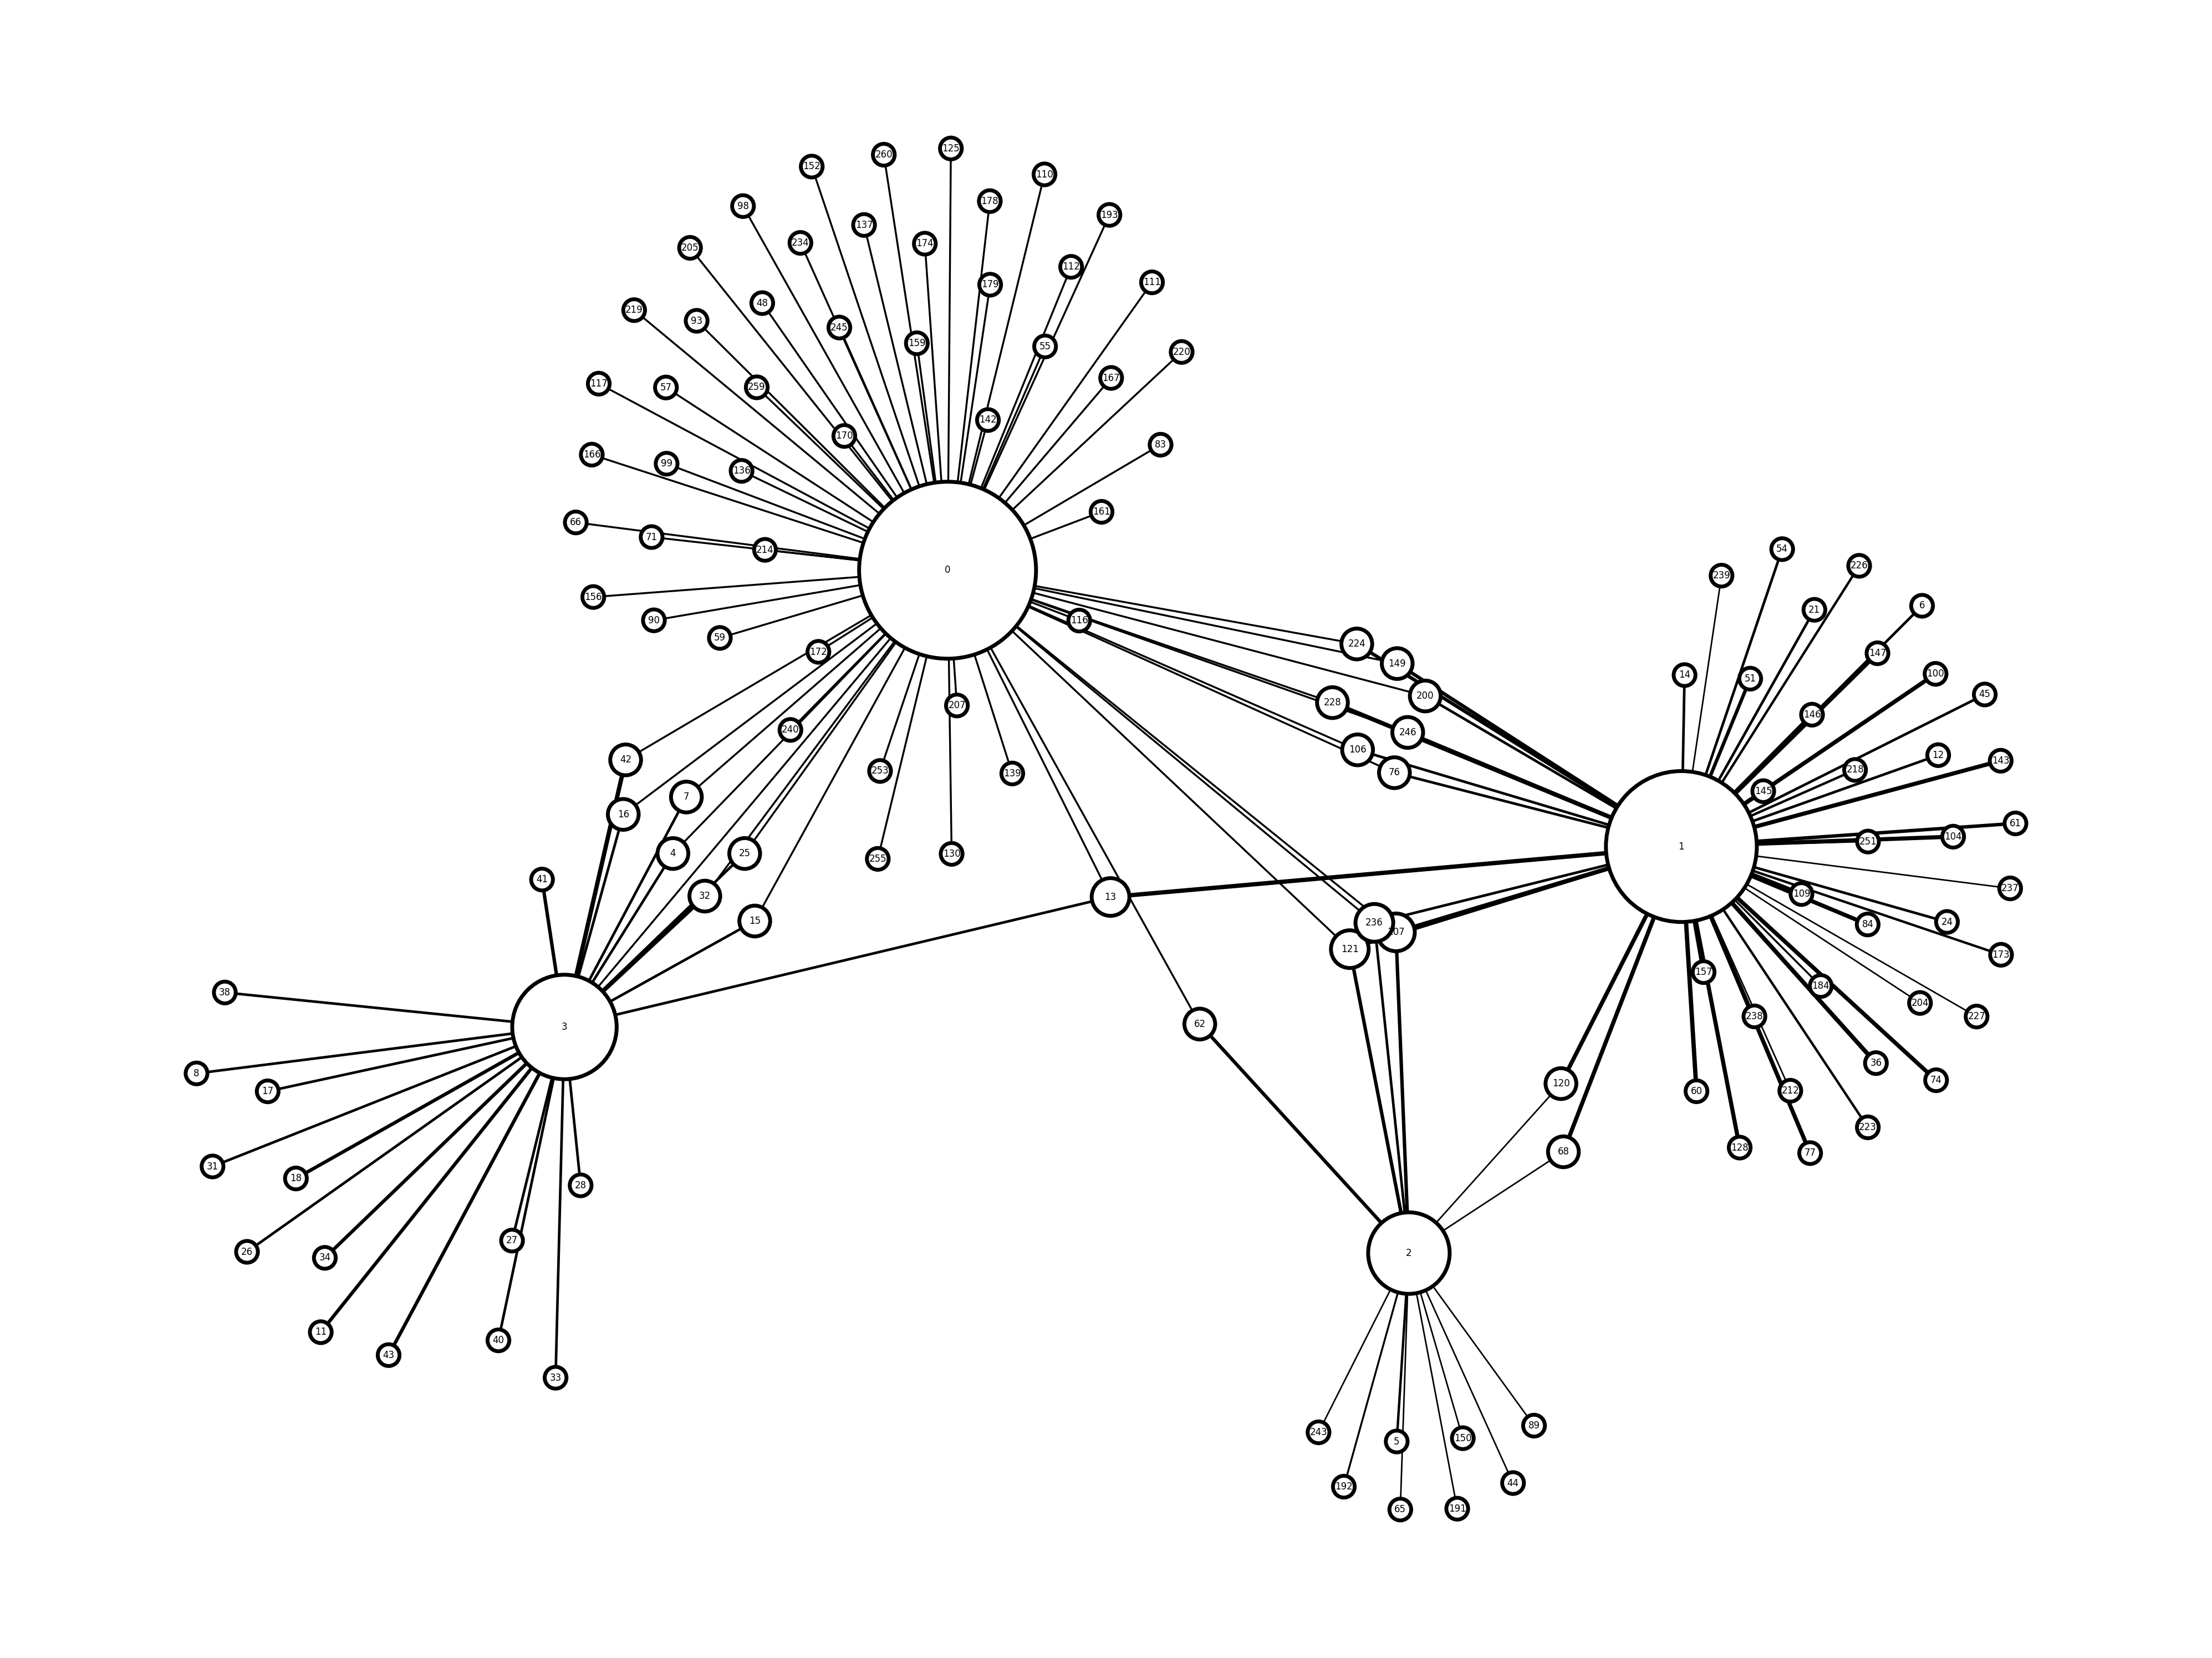

In [6]:
# 4. Visualizar a rede
fig, ax = plt.subplots(figsize = (40, 30))
g = nx.from_pandas_edgelist(edge_data[:partial_network_size], 'source', 'target', ['weight'])
pos = nx.spring_layout(g)  # position layout

nx.draw(g, pos,  with_labels=True, nodelist= node_names, node_size=[(v*800 if v > 0 else 3000) for v in node_degrees], node_color="white",edgecolors='black', linewidths=5, alpha=1 , width = edge_data['weight']*20)
ax.set_axis_off()
fig.tight_layout()
plt.show()

In [7]:
Kiv_graph = nx.from_pandas_edgelist(edge_data, 'source', 'target', ['weight'])
avg_neighbor_degree = nx.average_neighbor_degree(Kiv_graph)
print('Kiv: ', avg_neighbor_degree)


Kiv:  {0: 120.81818181818181, 3: 115.62142857142857, 4: 104.01242236024845, 7: 120.81818181818181, 13: 92.29383886255924, 15: 108.82666666666667, 16: 109.48701298701299, 25: 120.81818181818181, 32: 115.62142857142857, 42: 120.81818181818181, 48: 95.51269035532995, 55: 100.76162790697674, 57: 120.81818181818181, 59: 120.81818181818181, 62: 104.65030674846626, 66: 90.91666666666667, 71: 120.81818181818181, 76: 82.43442622950819, 83: 106.25, 90: 115.62142857142857, 93: 101.01923076923077, 98: 110.73469387755102, 99: 120.81818181818181, 106: 93.52450980392157, 107: 78.07692307692308, 110: 120.81818181818181, 111: 115.62142857142857, 112: 120.81818181818181, 116: 120.81818181818181, 117: 120.81818181818181, 121: 100.81502890173411, 125: 120.81818181818181, 130: 120.81818181818181, 136: 120.81818181818181, 137: 120.81818181818181, 139: 102.83333333333333, 142: 97.58333333333333, 149: 92.78155339805825, 152: 120.81818181818181, 156: 99.8313953488372, 159: 120.81818181818181, 161: 120.81818181

In [8]:
Ki_graph = nx.Graph(edge_data)
Ki = Ki_graph.degree()
print('Ki: ', Ki)




Ki:  [(0, 66), (3, 140), (4, 161), (7, 66), (13, 211), (15, 150), (16, 154), (25, 66), (32, 140), (42, 66), (48, 197), (55, 172), (57, 66), (59, 66), (62, 163), (66, 144), (71, 66), (76, 244), (83, 160), (90, 140), (93, 104), (98, 147), (99, 66), (106, 204), (107, 260), (110, 66), (111, 140), (112, 66), (116, 66), (117, 66), (121, 173), (125, 66), (130, 66), (136, 66), (137, 66), (139, 108), (142, 192), (149, 206), (152, 66), (156, 172), (159, 66), (161, 66), (166, 66), (167, 166), (170, 66), (172, 105), (174, 66), (178, 140), (179, 66), (193, 66), (200, 104), (205, 66), (207, 140), (214, 66), (219, 66), (220, 140), (224, 209), (228, 128), (234, 95), (236, 251), (240, 66), (245, 166), (246, 226), (253, 147), (255, 66), (259, 161), (260, 66), (1, 48), (6, 35), (12, 35), (14, 20), (21, 57), (24, 35), (36, 35), (45, 35), (51, 20), (54, 35), (60, 35), (61, 35), (68, 46), (74, 35), (77, 35), (84, 145), (100, 75), (104, 35), (109, 59), (120, 193), (128, 35), (143, 35), (145, 197), (146, 59),

In [9]:
df_Kiv = pd.DataFrame(list(avg_neighbor_degree.items()), columns=['Node', 'Kiv'])
df_Ki = pd.DataFrame(Ki, columns=['Node', 'Ki'])

In [10]:
df_Ks = df_Ki.merge(df_Kiv, on = 'Node')
df_Ks.head()

,Node,Ki,Kiv
0,0,66,120.818182
1,3,140,115.621429
2,4,161,104.012422
3,7,66,120.818182
4,13,211,92.293839


(1, 1000)

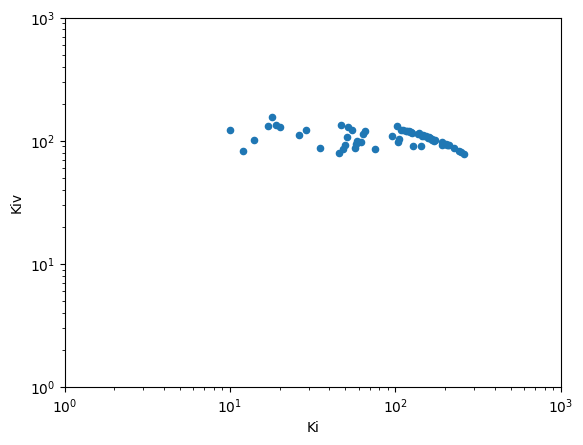

In [11]:

pd.DataFrame(df_Ks.groupby('Ki').Kiv.mean()).reset_index().plot.scatter(x = 'Ki', y = 'Kiv', loglog = True)
plt.ylim([1, 1000])
plt.xlim([1, 1000])

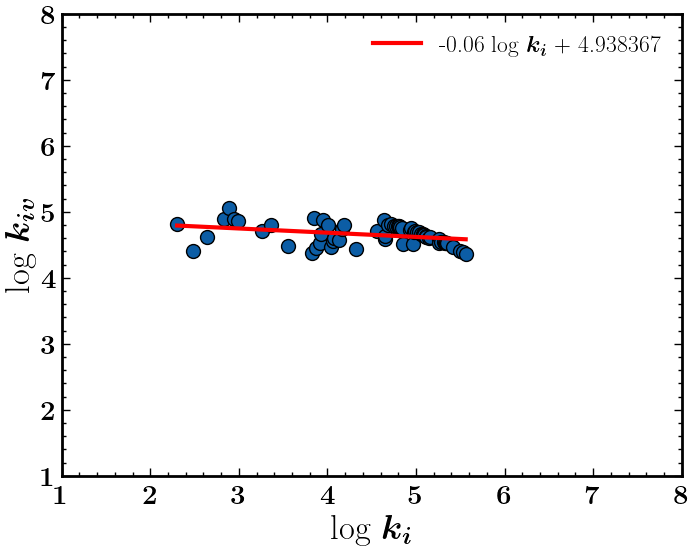

In [12]:
from scipy import stats
plt.style.use('JHStyleBold.mplstyle')
A=pd.DataFrame(df_Ks.groupby('Ki').Kiv.mean()).reset_index()
a=np.log(np.array(A['Ki']))
b=np.log(np.array(A['Kiv']))

res=stats.linregress(a,b)
res

plt.plot(a,b,'o')
plt.plot(a,a*res[0]+res[1],'r',label= "{:.2f} log $k_i$ + {:2f}".format(res[0],res[1]))
plt.xlabel('log $k_i$',fontsize=25)
plt.ylabel("log $k_{iv}$",fontsize=25)
plt.ylim([1, 8])
plt.xlim([1, 8])
plt.legend()